## Machin Learning Team Project

#### 주제 : 음주가 공부에 미치는 영향
#### *목표 : "음주를 비롯한 생활 방식의 데이터를 통해 학기 성적을 예측해보자"*

##### 변수 이름
- studentAC : student Alcohol Comsumption ----> 원본 데이터셋(33)
- StudentACU : Student Alcohol Consumption Use ----> 1차 컬럼 정리(22) <br># 필요 컬럼만 남겨준 데이터셋</br>
- StudentACU1 : Student Alcohol Consumption Use1 ----> 2차 컬럼 정리()<br># 위 데이터셋으로 상관관계 분석 후 정한 컬럼</br>

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 그래프 출력
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## 데이터 가져오기

In [2]:
import pandas as pd

# 데이터 읽어들이는 함수
def load_StudentAC_data():
    student_data = "C:\\Users\\hjn01\\ML_TeamProject\\Dateset\\student_merge.csv" # 자신 경로 설정!!
    return pd.read_csv(student_data)

In [3]:
#원본 데이터셋
studentAC = load_StudentAC_data()
studentAC 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [4]:
# 필요없는 컬럼 삭제 
studentACU = studentAC.drop(['school','Pstatus', 'Medu','Fedu','Mjob','Fjob','reason','guardian','paid','nursery'], axis=1)

studentACU 

,sex,age,address,famsize,traveltime,studytime,failures,schoolsup,famsup,activities,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,2,2,0,yes,no,no,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,1,2,0,no,yes,no,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,1,2,3,yes,no,no,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,1,3,0,no,yes,yes,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,1,2,0,no,yes,no,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,R,GT3,1,3,1,no,no,yes,...,5,4,2,1,2,5,4,10,11,10
1040,F,18,U,LE3,1,2,0,no,yes,no,...,4,3,4,1,1,1,4,15,15,16
1041,F,18,U,GT3,2,2,0,no,no,yes,...,1,1,1,1,1,5,6,11,12,9
1042,M,17,U,LE3,2,1,0,no,no,no,...,2,4,5,3,4,2,6,10,10,10


In [5]:
studentACU.info() # 컬럼 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   traveltime  1044 non-null   int64 
 5   studytime   1044 non-null   int64 
 6   failures    1044 non-null   int64 
 7   schoolsup   1044 non-null   object
 8   famsup      1044 non-null   object
 9   activities  1044 non-null   object
 10  higher      1044 non-null   object
 11  internet    1044 non-null   object
 12  romantic    1044 non-null   object
 13  famrel      1044 non-null   int64 
 14  freetime    1044 non-null   int64 
 15  goout       1044 non-null   int64 
 16  Dalc        1044 non-null   int64 
 17  Walc        1044 non-null   int64 
 18  health      1044 non-null   int64 
 19  absences    1044 non-null   int64 
 20  G1      

<AxesSubplot:xlabel='G2', ylabel='count'>

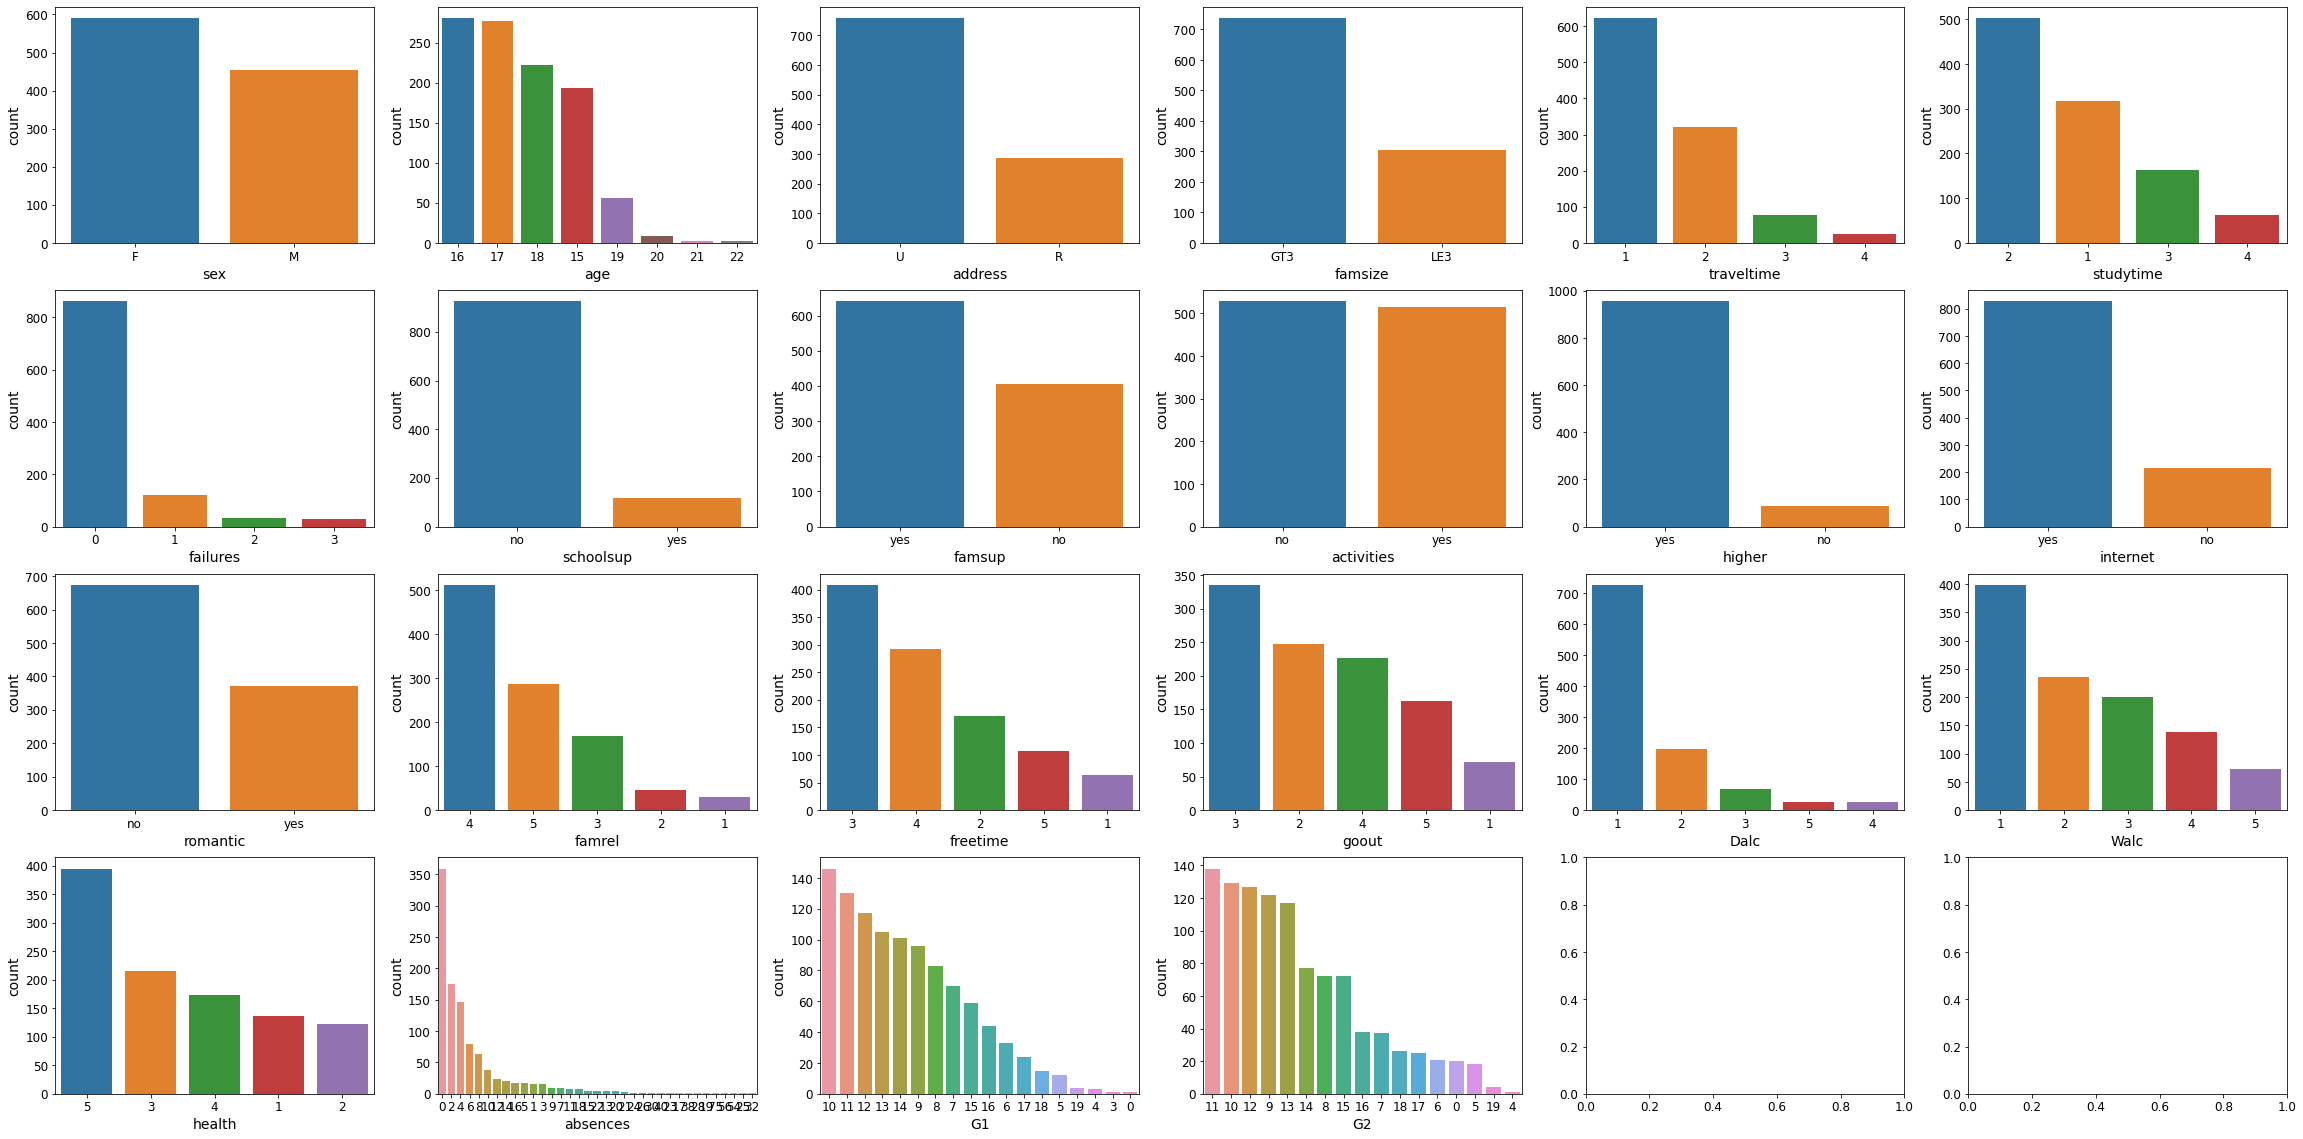

In [6]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


category = [col for col in studentACU.columns] # 변수의 리스트(글자 하나하나 적기엔......힘들어서 리스트로 접근) 
#print(category)

fig, axes = plt.subplots(4,6, figsize=(40,20)) # 4x6 행렬(총 22개)
sns.countplot(ax=axes[0,0], x=category[0], data=studentACU, order =studentACU[category[0]].value_counts().index) #sex
sns.countplot(ax=axes[0,1], x=category[1], data=studentACU, order =studentACU[category[1]].value_counts().index) #age
sns.countplot(ax=axes[0,2], x=category[2], data=studentACU, order =studentACU[category[2]].value_counts().index) #address
sns.countplot(ax=axes[0,3], x=category[3], data=studentACU, order =studentACU[category[3]].value_counts().index) #famsize
sns.countplot(ax=axes[0,4], x=category[4], data=studentACU, order =studentACU[category[4]].value_counts().index) # traveltime
sns.countplot(ax=axes[0,5], x=category[5], data=studentACU, order =studentACU[category[5]].value_counts().index) # studtytime

sns.countplot(ax=axes[1,0], x=category[6], data=studentACU, order =studentACU[category[6]].value_counts().index) # faiures
sns.countplot(ax=axes[1,1], x=category[7], data=studentACU, order =studentACU[category[7]].value_counts().index) # famsup
sns.countplot(ax=axes[1,2], x=category[8], data=studentACU, order =studentACU[category[8]].value_counts().index) # activities
sns.countplot(ax=axes[1,3], x=category[9], data=studentACU, order =studentACU[category[9]].value_counts().index) # higher
sns.countplot(ax=axes[1,4], x=category[10], data=studentACU, order =studentACU[category[10]].value_counts().index) # internet
sns.countplot(ax=axes[1,5], x=category[11], data=studentACU, order =studentACU[category[11]].value_counts().index) # romantic

sns.countplot(ax=axes[2,0], x=category[12], data=studentACU, order =studentACU[category[12]].value_counts().index) # famrel
sns.countplot(ax=axes[2,1], x=category[13], data=studentACU, order =studentACU[category[13]].value_counts().index) # freetime
sns.countplot(ax=axes[2,2], x=category[14], data=studentACU, order =studentACU[category[14]].value_counts().index) # goout
sns.countplot(ax=axes[2,3], x=category[15], data=studentACU, order =studentACU[category[15]].value_counts().index) # Dalc
sns.countplot(ax=axes[2,4], x=category[16], data=studentACU, order =studentACU[category[16]].value_counts().index) # Walc
sns.countplot(ax=axes[2,5], x=category[17], data=studentACU, order =studentACU[category[17]].value_counts().index) # health

sns.countplot(ax=axes[3,0], x=category[18], data=studentACU, order =studentACU[category[18]].value_counts().index) # absences
sns.countplot(ax=axes[3,1], x=category[19], data=studentACU, order =studentACU[category[19]].value_counts().index) # G1
sns.countplot(ax=axes[3,2], x=category[20], data=studentACU, order =studentACU[category[20]].value_counts().index) # G2
sns.countplot(ax=axes[3,3], x=category[21], data=studentACU, order =studentACU[category[21]].value_counts().index) # G3



# https://seaborn.pydata.org/generated/seaborn.countplot.html 

In [7]:
studentACU.describe() # 백분위 수, 평균, 표준편차, 최대/최소

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## 컬럼 간 상관관계 알아보기

#### - 그 전에 studentACU 컬럼들의 dtpye를 보면 object 타입이 있다. 
상관관계를 분석할 때 objet타입의 경우 무시된 채 int 타입만 출력되기 때문에 타입 변환이 필요하다.

### object 타입을 int64형으로 바꾸기

In [8]:
studentACU['sex'] = studentACU['sex'].map({'F': 0, 'M': 1}) # 성별. female(F) -> 0, male(M) -> 1로 변환 -----> 한번씩만 실행하셈
studentACU['address'] = studentACU['address'].map({'U': 0, 'R': 1}) # 주소 U(도시) -> 0, R(시골) -> 1로 변환 -----> 한번씩만 실행하셈
studentACU['famsize'] = studentACU['famsize'].map({'LE3': 2, 'GT3': 4}) # LE3 -> 2 , GT3 -> 4로 변환 -----> 한번씩만 실행하셈
# #(이진수: 'LE3' - 3 이하 또는 'GT3' - 3 초과)

studentACU = studentACU.replace('yes', 1) #famsup, activities, higher, internet, romantic
studentACU = studentACU.replace('no', 0)

studentACU

,sex,age,address,famsize,traveltime,studytime,failures,schoolsup,famsup,activities,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,0,4,2,2,0,1,0,0,...,4,3,4,1,1,3,6,5,6,6
1,0,17,0,4,1,2,0,0,1,0,...,5,3,3,1,1,3,4,5,5,6
2,0,15,0,2,1,2,3,1,0,0,...,4,3,2,2,3,3,10,7,8,10
3,0,15,0,4,1,3,0,0,1,1,...,3,2,2,1,1,5,2,15,14,15
4,0,16,0,4,1,2,0,0,1,0,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,19,1,4,1,3,1,0,0,1,...,5,4,2,1,2,5,4,10,11,10
1040,0,18,0,2,1,2,0,0,1,0,...,4,3,4,1,1,1,4,15,15,16
1041,0,18,0,4,2,2,0,0,0,1,...,1,1,1,1,1,5,6,11,12,9
1042,1,17,0,2,2,1,0,0,0,0,...,2,4,5,3,4,2,6,10,10,10


In [9]:
studentACU.info() # int 타입으로 잘 바뀌었는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex         1044 non-null   int64
 1   age         1044 non-null   int64
 2   address     1044 non-null   int64
 3   famsize     1044 non-null   int64
 4   traveltime  1044 non-null   int64
 5   studytime   1044 non-null   int64
 6   failures    1044 non-null   int64
 7   schoolsup   1044 non-null   int64
 8   famsup      1044 non-null   int64
 9   activities  1044 non-null   int64
 10  higher      1044 non-null   int64
 11  internet    1044 non-null   int64
 12  romantic    1044 non-null   int64
 13  famrel      1044 non-null   int64
 14  freetime    1044 non-null   int64
 15  goout       1044 non-null   int64
 16  Dalc        1044 non-null   int64
 17  Walc        1044 non-null   int64
 18  health      1044 non-null   int64
 19  absences    1044 non-null   int64
 20  G1          1044 non-null   in

In [10]:
# 컬럼간 상관관계 분석
student_corr = studentACU.corr()
student_corr

,sex,age,address,famsize,traveltime,studytime,failures,schoolsup,famsup,activities,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
sex,1.000000,-0.038832,-0.011556,-0.094361,0.042508,-0.239972,0.065543,-0.119411,-0.137696,0.116368,...,0.074725,0.181603,0.062530,0.275928,0.302623,0.141113,-0.013076,-0.025122,-0.025024,-0.031472
age,-0.038832,1.000000,0.071257,-0.013290,0.049216,-0.007870,0.282364,-0.202824,-0.116904,-0.073648,...,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282
address,-0.011556,0.071257,1.000000,0.054484,0.343803,-0.037480,0.061160,-0.023583,-0.011975,0.022095,...,0.016801,0.009744,-0.030790,0.064030,0.043391,0.010895,-0.036696,-0.113113,-0.127793,-0.117696
famsize,-0.094361,-0.013290,0.054484,1.000000,-0.031550,0.035109,0.044589,0.045552,0.067340,0.009434,...,0.005328,0.007249,-0.005889,-0.075646,-0.090019,0.009147,-0.018284,-0.057610,-0.057469,-0.061209
traveltime,0.042508,0.049216,0.343803,-0.031550,1.000000,-0.081328,0.087177,-0.033940,-0.026117,-0.025834,...,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627
studytime,-0.239972,-0.007870,-0.037480,0.035109,-0.081328,1.000000,-0.152024,0.070598,0.143858,0.078847,...,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,0.211314,0.183167,0.161629
failures,0.065543,0.282364,0.061160,0.044589,0.087177,-0.152024,1.000000,0.002483,-0.027574,-0.027500,...,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998,-0.374175,-0.377172,-0.383145
schoolsup,-0.119411,-0.202824,-0.023583,0.045552,-0.033940,0.070598,0.002483,1.000000,0.086945,0.001109,...,-0.007634,-0.026126,-0.051227,-0.025852,-0.093517,0.000785,-0.009104,-0.136877,-0.088393,-0.079346
famsup,-0.137696,-0.116904,-0.011975,0.067340,-0.026117,0.143858,-0.027574,0.086945,1.000000,-0.005199,...,0.002261,0.006227,0.005252,-0.022275,-0.073596,0.022668,0.031267,-0.013655,-0.004521,0.013313
activities,0.116368,-0.073648,0.022095,0.009434,-0.025834,0.078847,-0.027500,0.001109,-0.005199,1.000000,...,0.051574,0.128601,0.072236,-0.010584,0.006275,0.017165,-0.009998,0.067962,0.056000,0.033998


<AxesSubplot:>

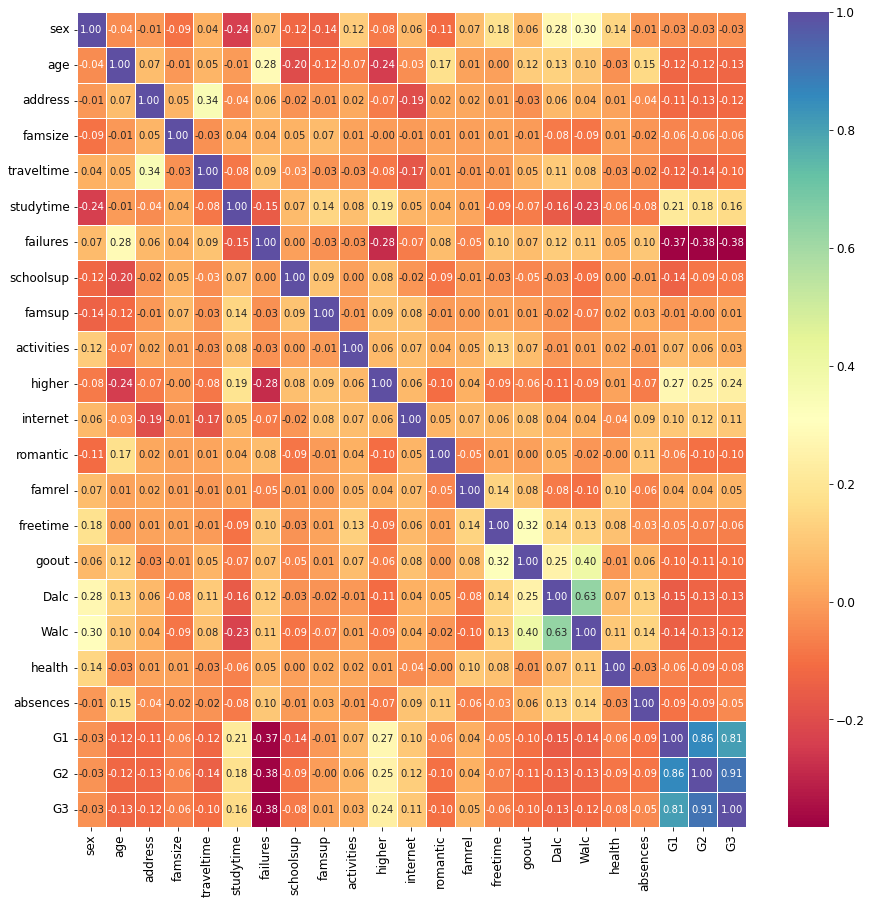

In [11]:
# 보기 편하게 그래프로 그려보자

#heatmap으로 그려 보기
plt.figure(figsize=(15,15))
sns.heatmap(student_corr, 
            annot=True, # 실제 값 화면에 나타내기
            fmt = '.2f', # annot이 true 일때 숫자 표시를 어떻게 할 건지
            linewidths=.5,
            cmap= 'Spectral'#'RdYlBu_r'#'Blues' # 색상으로 표시
           )

- 위 히트 맵을 통해 간의 상관관계 분석으로 주요한 컬럼을 뽑아보자<br></br>
Target은 "G3"<br>pick column: [age, address,  traverltime, studytime, failures, higher, internet, romamtic, goout, Dalc, Walc, G1, G2]</br>


- age, address, studytime, failures, higher, internet, Dalc, Walc, G1, G2 # 위 리스트에서 0.10인 컬럼 제외


In [12]:
# 상관관계 분석으로 컬럼 2차 정리
studentACU1 = studentACU.drop(['sex', 'famsize', 'schoolsup',  'famsup', 'activities',  'famrel', 'freetime',  'health', 'absences' ], axis=1)

studentACU1 # 학습할 최종 데이터 셋

,age,address,traveltime,studytime,failures,higher,internet,romantic,goout,Dalc,Walc,G1,G2,G3
0,18,0,2,2,0,1,0,0,4,1,1,5,6,6
1,17,0,1,2,0,1,1,0,3,1,1,5,5,6
2,15,0,1,2,3,1,1,0,2,2,3,7,8,10
3,15,0,1,3,0,1,1,1,2,1,1,15,14,15
4,16,0,1,2,0,1,0,0,2,1,2,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,19,1,1,3,1,1,1,0,2,1,2,10,11,10
1040,18,0,1,2,0,1,1,0,4,1,1,15,15,16
1041,18,0,2,2,0,1,0,0,1,1,1,11,12,9
1042,17,0,2,1,0,1,1,0,5,3,4,10,10,10


In [13]:
studentACU1.info()
#studentACU1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         1044 non-null   int64
 1   address     1044 non-null   int64
 2   traveltime  1044 non-null   int64
 3   studytime   1044 non-null   int64
 4   failures    1044 non-null   int64
 5   higher      1044 non-null   int64
 6   internet    1044 non-null   int64
 7   romantic    1044 non-null   int64
 8   goout       1044 non-null   int64
 9   Dalc        1044 non-null   int64
 10  Walc        1044 non-null   int64
 11  G1          1044 non-null   int64
 12  G2          1044 non-null   int64
 13  G3          1044 non-null   int64
dtypes: int64(14)
memory usage: 114.3 KB


In [14]:
studentACU2 = studentACU1.drop(['G1', 'G2' ], axis=1)

studentACU2

,age,address,traveltime,studytime,failures,higher,internet,romantic,goout,Dalc,Walc,G3
0,18,0,2,2,0,1,0,0,4,1,1,6
1,17,0,1,2,0,1,1,0,3,1,1,6
2,15,0,1,2,3,1,1,0,2,2,3,10
3,15,0,1,3,0,1,1,1,2,1,1,15
4,16,0,1,2,0,1,0,0,2,1,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,19,1,1,3,1,1,1,0,2,1,2,10
1040,18,0,1,2,0,1,1,0,4,1,1,16
1041,18,0,2,2,0,1,0,0,1,1,1,9
1042,17,0,2,1,0,1,1,0,5,3,4,10


In [15]:
studentACU2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         1044 non-null   int64
 1   address     1044 non-null   int64
 2   traveltime  1044 non-null   int64
 3   studytime   1044 non-null   int64
 4   failures    1044 non-null   int64
 5   higher      1044 non-null   int64
 6   internet    1044 non-null   int64
 7   romantic    1044 non-null   int64
 8   goout       1044 non-null   int64
 9   Dalc        1044 non-null   int64
 10  Walc        1044 non-null   int64
 11  G3          1044 non-null   int64
dtypes: int64(12)
memory usage: 98.0 KB


<br></br>
데이터 정제 The end!!!!!<br></br>
이제 머신러닝 모델 학습 start!!
<br></br>

## 훈련세트 && 테스트 세트 나눠주기

In [16]:
from sklearn.model_selection import train_test_split

# data, target 정해 주기
data = studentACU1[['age', 'address', 'traveltime', 'studytime', 'failures', 'higher','internet', 'romantic','goout', 'Dalc', 'Walc', 'G1', 'G2']].to_numpy()

target = studentACU1['G3'].to_numpy()

# 훈련 & 테스트 나누기
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.3, shuffle=True)#, stratify=target, random_state=42)

## Moding 여러가지 모델로 학습해보자 
- 어떤 모델이 우리 데이터 셋에 적절한지 찾아보자

In [17]:
# 여러 모델을 학습 후 결과 비교를 위한  result DATAFRAME 선언
result = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

##### 1번모델 : 로지스틱 회귀

In [18]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

lgclassifier = LogisticRegression(solver = 'saga',random_state = 0) 
lgclassifier.fit(train_input, train_target)
# y_pred = lgclassifier.predict(test_input)

a = lgclassifier.score(train_input, train_target)
b = lgclassifier.score(test_input, test_target)

print(lgclassifier.score(train_input, train_target))
print(lgclassifier.score(test_input, test_target))

# 결과 result 테이블에 넣기
result = result.append(pd.Series({'Model':'Logistic Regression','Train Accuracy':a,'Test Accuracy':b}),ignore_index=True )


# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# 실행시 뜨는 aappend 에러 무시해도 괜찮음

C:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.42876712328767125
0.2898089171974522


C:\Users\hjn01\AppData\Local\Temp\ipykernel_11044\3097774442.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'Logistic Regression','Train Accuracy':a,'Test Accuracy':b}),ignore_index=True )


##### 로지스틱 회귀 - 하이퍼 파라미터 튜닝

In [19]:
#최적화(optimization): 파라미터(모델)와 하이퍼파라미터(연구자)를 조정해서 모델의 성능을 높이는 것.
#학습할 때 하이퍼파라미터를 성능이 가장 좋은 성능을 만드는 것.

########
# 기본적으로 분류기의 역할을 하며, 성능 역시 과하게 낮아 하이퍼 파라미터 튜닝이 의미 없다고 판단함.


##### 2번 모델 : 결정 트리 Regreossor

In [20]:
# DecisionTreeRegreossor

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

#하이퍼 파라미터 튜닝 X
# dt_r = DecisionTreeRegressor()

#하이퍼 파라미터 튜닝 후
dt_r =  DecisionTreeRegressor(
        max_depth=4,
        criterion='squared_error',
        min_samples_leaf=13
    )
dt_r.fit(train_input, train_target)

a = dt_r.score(train_input, train_target)
b = dt_r.score(test_input, test_target)

print(dt_r.score(train_input, train_target))
print(dt_r.score(test_input, test_target))

# 결과 result 테이블에 정확도 넣기
result = result.append(pd.Series({'Model':'Decison Tree Regressor','Train Accuracy':a,'Test Accuracy':b}),ignore_index=True )


#파라미터 튜닝 전
# 0.9996779659649728
# 0.5814954475824354

# 튜닝 후
# 0.8648312632709616
# 0.7484985252931828

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

0.8284018841099376
0.8214825652306348


C:\Users\hjn01\AppData\Local\Temp\ipykernel_11044\2522997740.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'Decison Tree Regressor','Train Accuracy':a,'Test Accuracy':b}),ignore_index=True )


##### 결정트리 Regressor - 하이퍼 파라미터 튜닝

In [21]:
# #RandomizedSearchCV를 사용하여 파라미터값을 랜덤 대입해 최적의 파라미터 값을 검색.
# from scipy.stats import randint
# from sklearn.model_selection import RandomizedSearchCV

# # DecisionTree Regressor 파라미터 값 설명.
# # 
# # max_depth
# #


# DTRG_params ={
#                 'criterion':['squared_error','friedman_mse'],
#                 'max_depth':randint(low=1, high=10),
#                 # 'max_leaf_nodes':[None,2,3,4,5,6,7],
#                 # 'min_samples_split':[2,3,4,5,6],
#                 'min_samples_leaf': randint(low=10, high=50),
#                 # 'max_features':[None,'sqrt','log2',3,4,5]
#             }

# DCRG_RD = DecisionTreeRegressor()
# RDSearch = RandomizedSearchCV(DCRG_RD, param_distributions=DTRG_params, n_iter=50, cv=5, scoring='neg_mean_squared_error')
# RDSearch.fit(train_input, train_target)

# CV_result = RDSearch.cv_results_ 

# #결과 값 오차순으로 정렬하여, 가장 오차가 낮은 파라미터를 확인 후, 위 모델에 다시 대입.
# tunning_result = list(zip(CV_result["mean_test_score"], CV_result["params"]))
# tunning_result.sort(reverse=True, key=lambda x : x[0])

# for mean_score, params in tunning_result:
#     print(np.sqrt(-mean_score), params)

##### 결정트리 Regressor - 결정트리 그리기

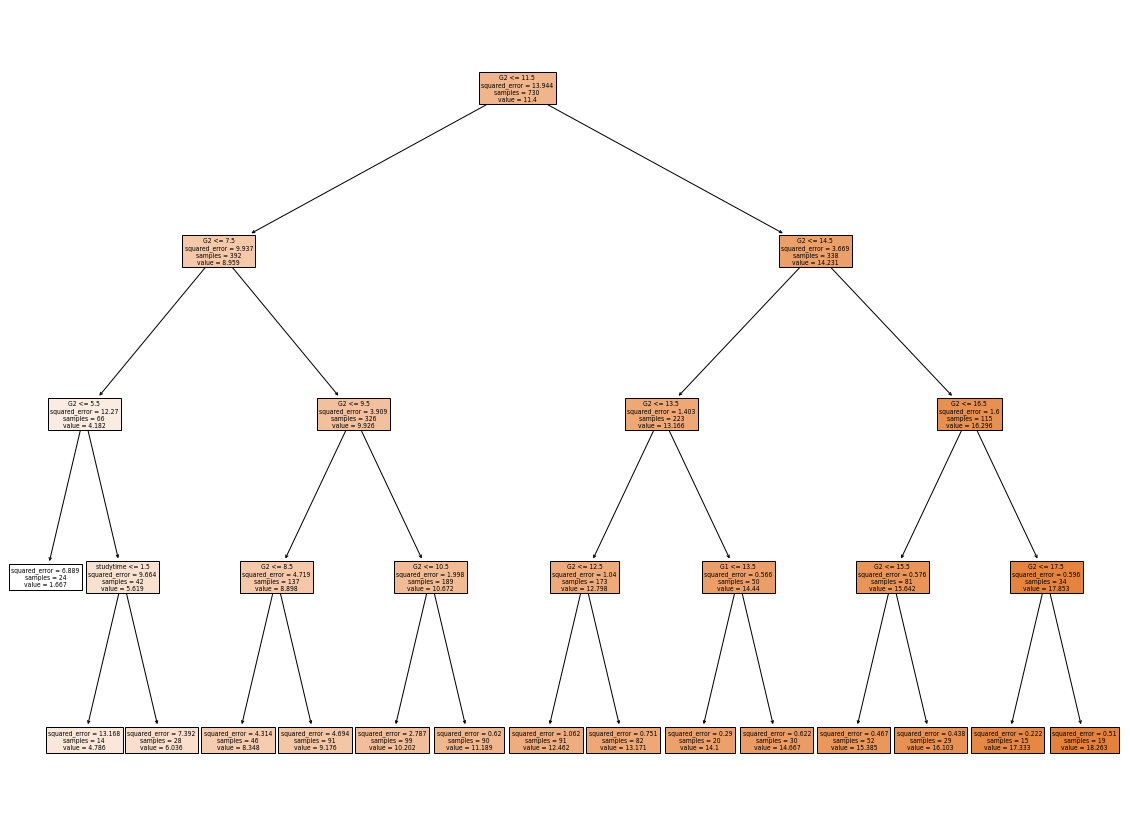

In [22]:
# matplotlib 로 결정트리 그려보기

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(dt_r, filled=True, feature_names=['age', 'address', 'traveltime', 'studytime', 'failures', 'higher','internet', 'romantic','goout', 'Dalc', 'Walc', 'G1', 'G2'])
plt.savefig("dt_r_result.pdf") # 저장
plt.show()

##### 3번 모델: 서프트 벡터 머신 Kernelized

In [23]:
from sklearn import svm

KSVC_clf = svm.SVC(kernel='sigmoid',C=10,gamma=0.001)
KSVC_clf.fit(train_input, train_target)

a = KSVC_clf.score(train_input, train_target)
b = KSVC_clf.score(test_input, test_target)

print(KSVC_clf.score(train_input, train_target))
print(KSVC_clf.score(test_input, test_target))

# 결과 result 테이블에 정확도 넣기
result = result.append(pd.Series({'Model':'Kernelized SVM','Train Accuracy':a,'Test Accuracy':b}),ignore_index=True )


# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

0.3780821917808219
0.35987261146496813


C:\Users\hjn01\AppData\Local\Temp\ipykernel_11044\882420811.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'Kernelized SVM','Train Accuracy':a,'Test Accuracy':b}),ignore_index=True )


##### 서포트 벡터 머신 Kernelized - 하이퍼 파라미터 튜닝

In [24]:
#### 너무 낮게 나와서 안함.

##### 4번 모델 : 랜덤 포레스트 regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 100
# regr = RandomForestRegressor(max_depth=5, min_samples_leaf=8, min_samples_split=16,n_estimators=100)#random_state=0)
#regr = RandomForestRegressor() #하이퍼 파라미터 튜닝 X

#하이퍼 파라미터 튜닝 완료 값.
regr = RandomForestRegressor(max_depth=10,max_features=7,n_estimators=173) 



regr.fit(train_input, train_target)

a = regr.score(train_input, train_target)
b = regr.score(test_input, test_target)


print(regr.score(train_input, train_target))
print(regr.score(test_input, test_target))

# 결과 result 테이블에 정확도 넣기
result = result.append(pd.Series({'Model':'RandomForestRegressor','Train Accuracy':a,'Test Accuracy':b}),ignore_index=True )

# 튜닝 전
# 0.9767455733333666
# 0.7403084516586431

# 튜닝 후
# 0.9685004436756117
# 0.756712722032685


0.9617327849380644
0.8155643123050822


C:\Users\hjn01\AppData\Local\Temp\ipykernel_11044\1596626630.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'RandomForestRegressor','Train Accuracy':a,'Test Accuracy':b}),ignore_index=True )


##### 랜덤포레스트 Regressor - 하이퍼 파라미터 튜닝

In [26]:
# #RandomizedSearchCV를 사용하여 파라미터값을 랜덤 대입해 최적의 파라미터 값을 검색.
# from scipy.stats import randint
# from sklearn.model_selection import RandomizedSearchCV

# # RandomForestRegressor 파라미터 값 설명.
# # n_estimators: 생성할 Tree 개수
# # criterion : 분할 품질을 측정하는 기능 (default : gini)
# # max_depth : 트리의 최대 깊이
# # max_features : 각 노드에서 분할에 사용할 특징의 최대 수


# RFRG_params ={
#     'n_estimators': randint(low=1, high=200),
#     'max_features': randint(low=1, high=8),
#     'max_depth' : randint(low=1, high = 50)
# }

# RFRG_RD = RandomForestRegressor()
# RDSearch = RandomizedSearchCV(RFRG_RD, param_distributions=RFRG_params, n_iter=50, cv=5, scoring='neg_mean_squared_error')
# RDSearch.fit(train_input, train_target)

# CV_result = RDSearch.cv_results_ 

# #결과 값 오차순으로 정렬하여, 가장 오차가 낮은 파라미터를 확인 후, 위 모델에 다시 대입.
# tunning_result = list(zip(CV_result["mean_test_score"], CV_result["params"]))
# tunning_result.sort(reverse=True)

# for mean_score, params in tunning_result:
#     print(np.sqrt(-mean_score), params)

##### 5번 모델 : XGBRegressor

In [27]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate

#하이퍼파라미터 튜닝X
# xgb = XGBRegressor()

# xgb = XGBRegressor(max_depth=2, min_samples_leaf=8, min_sample_split=16, n_estimators=100)#tree_method='hist', random_state=42)

#dart 방식은 과적합이 상대적으로 심하여 gbtree 방식 booster 선택.
# xgb = XGBRegressor(skip_drop=0, sample_type= 'uniform', rate_drop= 0.2, booster='dart')
xgb = XGBRegressor(booster ='gbtree', learning_rate=0.1,max_depth=3,n_estimators=63)


scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

a = np.mean(scores['train_score'])
b = np.mean(scores['test_score'])

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

# 결과 result 테이블에 정확도 넣기
result = result.append(pd.Series({'Model':'XGBRegressor','Train Accuracy':a,'Test Accuracy':b}),ignore_index=True )

#하이퍼파라미터 튜닝X
# 0.9976330068351025
# 0.8052925704563478

#하이퍼파라미터 튜닝 후
# 0.9067115016713991
# 0.8434975104140227
# print(f"Train score: {np.mean(scores['train_score'])}, Test score: {np.mean(scores['test_score'])}")

0.8797701230059453
0.8202054030385613


C:\Users\hjn01\AppData\Local\Temp\ipykernel_11044\2620203818.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'XGBRegressor','Train Accuracy':a,'Test Accuracy':b}),ignore_index=True )


#####  XGBRegressor - 하이퍼 파라미터 튜닝

In [28]:
# #RandomizedSearchCV를 사용하여 파라미터값을 랜덤 대입해 최적의 파라미터 값을 검색.
# from scipy.stats import randint
# from sklearn.model_selection import RandomizedSearchCV

# # XGBRegressor 파라미터 값 설명.
# # booster : 어떤 부스터 구조를 쓸지 결정(gbtree, gblinear, dart)
# # eta: learning rate. 트리에 가지가 많을 수록 과적합. 매 부스팅 스탭마다 weight를 주어 부스팅 과정에 과적합이 일어나지 않도록 한다.
# # gamma: 정보흭득(information Gain)에서 -r로 표현한 바 있다. 이것이 커지면, 트리 깊이가 줄어들어 보수적인 모델이 된다. ( 디폴트는 0 )
# # max_depth : 한 트리의 maxium depth.
# # lambda (L2 reg-form) : L2 Regularization Form에 달리는 weights. 숫자가 클수록 보수적인 모델.
# # alpha(L1 reg-form) : L1 Regularization Form에 달리는 weights. 숫자가 클수록 보수적인 모델.
# # objective : 목적함수이다. reg:linear(linear-regression), binary:logistic(binary-logistic-classification), count:poisson(count data poison regression) 등 다양
# # eval_metric : 모델의 평가 함수를 조정하는 함수 - rmse(root mean square error), logloss(log-likelihood), map(mean average precision) 등 데이터의 특성에 맞게 평가 함수를 조정
# # num_rounds : 부스팅 라운드를 결정한다. 랜덤하게 생성되는 모델이니만큼 이 수 가 적당히 큰게 좋다 epochs 옵션과 동일하다 .


# #param_distributions를 아래 두 방식중 선택하여 사용
# #gbtree 방식의 booster가 과적합이 덜하여 해당 방식으로 선택.
# XGBR_params ={
#    'booster' : ['gbtree'], #선형모델은 목적과 맞지않으니 제외
#     'n_estimators' : randint(low=50, high=1000),
#     'learning_rate' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
#     'max_depth': randint(low=2, high=15)
# }
# XGBDart_params ={
#     'booster' : ['dart'],
#     'sample_type' : ['uniform', 'weighted'],
#     'rate_drop' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
#     'skip_drop' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# }

# XGBR_RD = XGBRegressor()
# RDSearch = RandomizedSearchCV(XGBR_RD, param_distributions=XGBR_params, n_iter=50, cv=5, scoring='neg_mean_squared_error')
# RDSearch.fit(train_input, train_target)

# CV_result = RDSearch.cv_results_ 

# #결과 값 오차순으로 정렬하여, 가장 오차가 낮은 파라미터를 확인 후, 위 모델에 다시 대입.
# tunning_result = list(zip(CV_result["mean_test_score"], CV_result["params"]))
# tunning_result.sort(reverse=True, key=lambda x : x[0])

# for mean_score, params in tunning_result:
#     print(np.sqrt(-mean_score), params)

In [29]:
result

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.428767,0.289809
1,Decison Tree Regressor,0.828402,0.821483
2,Kernelized SVM,0.378082,0.359873
3,RandomForestRegressor,0.961733,0.815564
4,XGBRegressor,0.87977,0.820205


#### Test 기준으로 result 테이블 정렬

##### - 모델 하이퍼파라미터 테이블 

In [30]:
# result = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy']) # 초기화 
result.sort_values(by='Test Accuracy', ascending=False)

,Model,Train Accuracy,Test Accuracy
1,Decison Tree Regressor,0.828402,0.821483
4,XGBRegressor,0.87977,0.820205
3,RandomForestRegressor,0.961733,0.815564
2,Kernelized SVM,0.378082,0.359873
0,Logistic Regression,0.428767,0.289809


여러가지 모델로 학습한 후 result 데이터 프레임을 보면 정확도를 확인 할 수 있다.<br></br>
##### - 가장 잘 나온 3개 "Decison Tree Regressor", "RamdomForestRegressor", "XGBRegressor" 모델을 좀 더 알아보자<br></br>

In [32]:
from sklearn.model_selection import train_test_split

# data, target 정해 주기
# 훈련 & 테스트 나누기

### 점수포함 ###
# data_scoreInclude = studentACU1[['age', 'address', 'traveltime', 'studytime', 'failures', 'higher','internet', 'romantic','goout', 'Dalc', 'Walc', 'G1', 'G2']].to_numpy()
# target = studentACU1['G3'].to_numpy()

# train_input, test_input, train_target, test_target = train_test_split(data_scoreInclude, target, test_size=0.3, shuffle=True)#, stratify=target, random_state=42)

### 점수 미포함 ###
data_scoreExcept = studentACU2[['age', 'address', 'traveltime', 'studytime', 'failures', 'higher','internet', 'romantic','goout', 'Dalc', 'Walc']].to_numpy()
target = studentACU2['G3'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data_scoreExcept, target, test_size=0.3, shuffle=True)#, stratify=target, random_state=42)

### 1. 결정트리 Regressor

In [33]:
# DecisionTreeRegreossor

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score


#하이퍼 파라미터 튜닝 후
dt_r =  DecisionTreeRegressor(
        max_depth=4,
        criterion='squared_error',
        min_samples_leaf=13
    )
dt_r.fit(train_input, train_target)

a = dt_r.score(train_input, train_target)
b = dt_r.score(test_input, test_target)

print(dt_r.score(train_input, train_target))
print(dt_r.score(test_input, test_target))

# 예측
# print(dt_r.predict([data_scoreInclude[0, :]])) 
print(dt_r.predict([data_scoreExcept[0, :]]))

0.24168027884955512
0.1404201936667906
[12.14242424]


#### 결정 트리 도식화

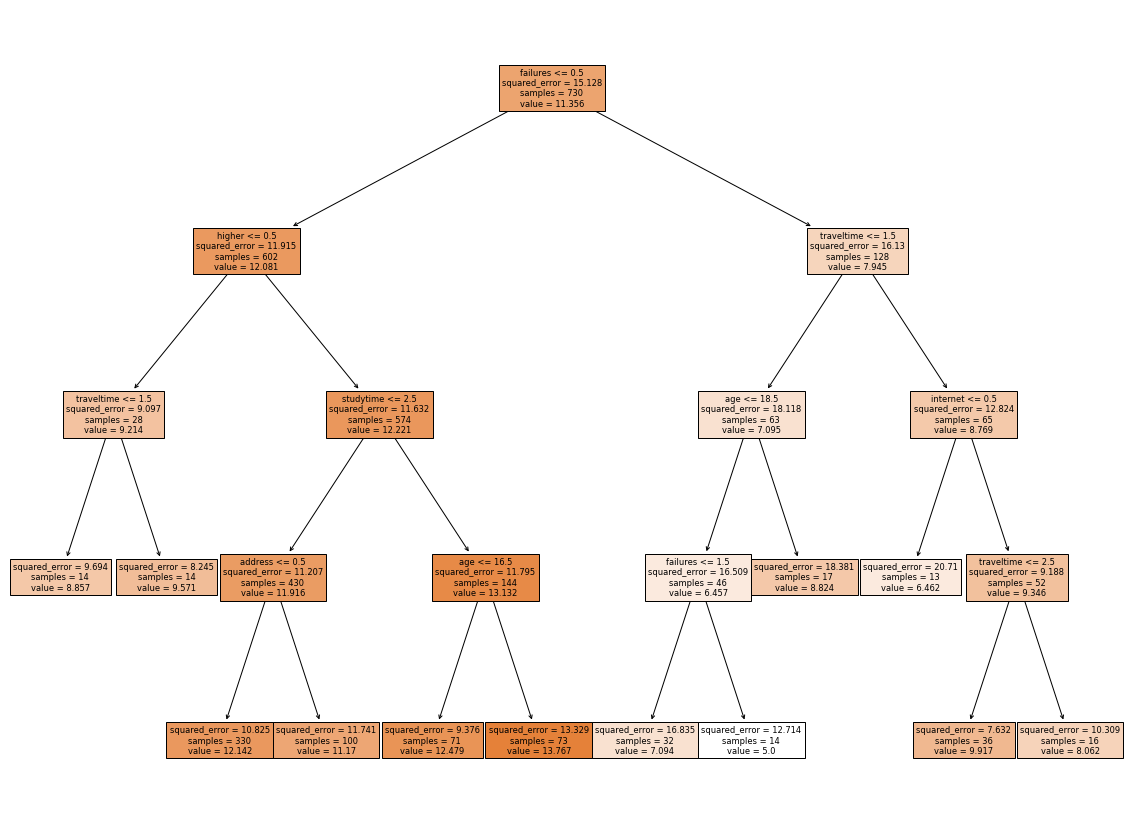

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
# plot_tree(dt_r, filled=True, feature_names=['age', 'address', 'traveltime', 'studytime', 'failures', 'higher','internet', 'romantic','goout', 'Dalc', 'Walc', 'G1', 'G2'])
plot_tree(dt_r, filled=True, feature_names=['age', 'address', 'traveltime', 'studytime', 'failures', 'higher','internet', 'romantic','goout', 'Dalc', 'Walc'])
plt.savefig("dt_r_scoreExcept.pdf") # 저장
plt.show()

#### 결정트리 특성 중요도 

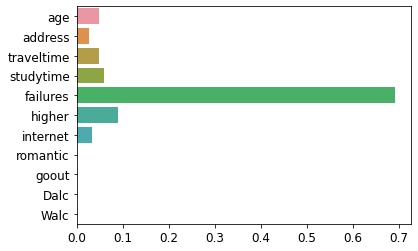

In [36]:
import seaborn as sns
data = studentAC[['age', 'address', 'traveltime', 'studytime', 'failures', 'higher','internet', 'romantic','goout', 'Dalc', 'Walc']]

dt_r_importances = dt_r.feature_importances_.tolist()

col_list = data.columns.values.tolist()

# print(xgb_importances)

sns.barplot(x = dt_r_importances, y = col_list)
plt.show()

### 2. 랜덤포레스트 Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


regr = RandomForestRegressor(max_depth=10)#,max_features=7,n_estimators=173) 


.fit(train_input, train_target)

a = regr.score(train_input, train_target)
b = regr.score(test_input, test_target)


print(regr.score(train_input, train_target))
print(regr.score(test_input, test_target))


# 예측
# print(regr.predict([data_scoreInclude[0, :]])) 
print(regr.predict([data_scoreExcept[0, :]]))

0.6494474561297043
0.0846541978487646
[8.7287588]


#### 랜덤포레스트 특성 중요도

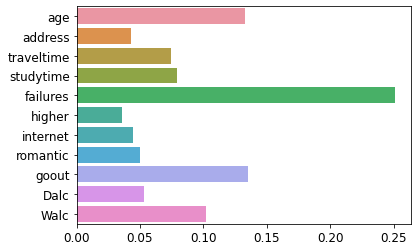

In [38]:
import seaborn as sns
data = studentAC[['age', 'address', 'traveltime', 'studytime', 'failures', 'higher','internet', 'romantic','goout', 'Dalc', 'Walc']]

regr_importances = regr.feature_importances_.tolist()

col_list = data.columns.values.tolist()

# print(xgb_importances)

sns.barplot(x = regr_importances, y = col_list)
plt.show()

### 3. XGBRegressor

In [39]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate


xgb = XGBRegressor(booster ='gbtree', learning_rate=0.1,max_depth=3,n_estimators=63)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

xgb.fit(train_input, train_target)

a = np.mean(scores['train_score'])
b = np.mean(scores['test_score'])

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))


# 예측
# print(xgb.predict([data_scoreInclude[0, :]])) 
print(xgb.predict([data_scoreExcept[0, :]]))

0.3708921364412867
0.16154858838709846
[11.003041]


#### XGB 특성 중요도

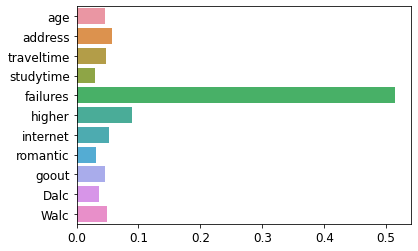

In [40]:
import seaborn as sns
data = studentAC[['age', 'address', 'traveltime', 'studytime', 'failures', 'higher','internet', 'romantic','goout', 'Dalc', 'Walc']]

xgb_importances = xgb.feature_importances_.tolist()

col_list = data.columns.values.tolist()

# print(xgb_importances)

sns.barplot(x = xgb_importances, y = col_list)
plt.show()

<br></br> 
## 학생에게 주는 설문지!! 
- 설문을 통해 자신의 마지막 학기 성적을 예측해 보세요~

ver 1.0 (score Include)

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split



### 점수포함 ###
data_scoreInclude = studentACU1[['age', 'address', 'traveltime', 'studytime', 'failures', 'higher','internet', 'romantic','goout', 'Dalc', 'Walc', 'G1', 'G2']].to_numpy()
target = studentACU1['G3'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data_scoreInclude, target, test_size=0.3, shuffle=True)#, stratify=target, random_state=42)



def dtr(list):
    # DecisionTreeRegreossor
    #하이퍼 파라미터 튜닝 후
    dt_r =  DecisionTreeRegressor(
            max_depth=4,
            criterion='squared_error',
            min_samples_leaf=13
        )
    dt_r.fit(train_input, train_target)

    # 예측
    # print(dt_r.predict([data_scoreIn[0, :]]))
    # print(dt_r.predict([data_scoreExcept[0, :]]))
    
    prescore = dt_r.predict([list])
    print("")
    print("===============================SCORE===============================")
    name = input("Please enter your name to check your prediction score: ")
    print(f"{name}'s prediction score for the last semester is {prescore}.")
    print("The perfect score is 20.")
    print("===================================================================")
    

def regr(list):

    regr = RandomForestRegressor(max_depth=10)#,max_features=7,n_estimators=173) 
    regr.fit(train_input, train_target)

    # 예측
    # print(regr.predict([data_scoreInclude[0, :]])) 
    # print(regr.predict([data_scoreExcept[0, :]]))
    
    prescore = regr.predict([list])
    
    print("")
    print("===============================SCORE===============================")
    name = input("Please enter your name to check your prediction score: ")
    print(f"{name}'s prediction score for the last semester is {prescore}.")
    print("The perfect score is 20.")
    print("===================================================================")

def xgb(list):
    xgb = XGBRegressor(booster ='gbtree', learning_rate=0.1,max_depth=3,n_estimators=63)
    scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)
    xgb.fit(train_input, train_target)

    # 예측
    # print(xgb.predict([data_scoreInclude[0, :]]))
    # print(xgb.predict([data_scoreExcept[0, :]]))
    prescore = xgb.predict([list])
    
    print("")
    print("===============================SCORE===============================")
    name = input("Please enter your name to check your prediction score: ")
    print(f"{name}'s prediction score for the last semester is {prescore}.")
    print("The perfect score is 20.")
    print("===================================================================")

# 'age', 'address', 'traveltime', 'studytime', 'failures', 'higher','internet', 'romantic','goout', 'Dalc', 'Walc'
analysis_list = []
age = int(input("1. What is student's age?(15~22)\nA)"))
analysis_list.append(age)

address = int(input("2. Where is the student's address, urban(0) or rural(1)?\nA)"))
analysis_list.append(address)

traveltime = int(input("3. How long does the average student traveltime to school?(1~4)\nA)"))
analysis_list.append(traveltime)

studytime = int(input("4. What is the student's weekly study time?(1~4)\nA)"))
analysis_list.append(studytime)

failures = int(input("5. What is the number of past class failures for a student?(0~3)\nA)"))
analysis_list.append(failures)

higher = int(input("6. Does the student want to get a higher education?(0,1)\nA)"))
analysis_list.append(higher)

internet = int(input("7. Is there an internet connection at the student's house?(0,1)\nA)"))
analysis_list.append(internet)

romantic = int(input("8. Is the student in a romantic relationship?(0,1)\nA)"))
analysis_list.append(romantic)

goout = int(input("9. How often does a student go out with his friends?(1~5)\nA)"))
analysis_list.append(goout)

dalc = int(input("10. What is the student's daily alcohol consumption?(1~5)\nA)"))
analysis_list.append(dalc)

walc = int(input("11. What is the student's weekend alcohol consumption?(1~5)\nA)"))
analysis_list.append(walc)

gone = int(input("12. What is the grade of a student in the first semester?(0~20)\nA)"))
analysis_list.append(gone)

gtwo = int(input("13. What is the grade of a student in the second semester?(0~20)\nA)"))
analysis_list.append(gtwo)
# print(analysis_list)

# for i in range(11):
#     print(type(analysis_list[i]))


Select_model = int(input("Please select a model(1:dtr, 2:regr, 3:xgb): "))

if Select_model == 1:
    dtr(analysis_list)
    
elif Select_model == 2:
    regr(analysis_list)

elif Select_model == 3:
    xgb(analysis_list)
else:
    pass
    





1. What is student's age?(15~22)
A) 22
2. Where is the student's address, urban(0) or rural(1)?
A) 0
3. How long does the average student traveltime to school?(1~4)
A) 3
4. What is the student's weekly study time?(1~4)
A) 2
5. What is the number of past class failures for a student?(0~3)
A) 0
6. Does the student want to get a higher education?(0,1)
A) 0
7. Is there an internet connection at the student's house?(0,1)
A) 1
8. Is the student in a romantic relationship?(0,1)
A) 0
9. How often does a student go out with his friends?(1~5)
A) 2
10. What is the student's daily alcohol consumption?(1~5)
A) 1
11. What is the student's weekend alcohol consumption?(1~5)
A) 1
12. What is the grade of a student in the first semester?(0~20)
A) 15
13. What is the grade of a student in the second semester?(0~20)
A) 15
Please select a model(1:dtr, 2:regr, 3:xgb):  2



===============================SCORE===============================


Please enter your name to check your prediction score:  hyeonjung


hyeonjung's prediction score for the last semester is [15.49842586].
The perfect score is 20.


<br></br>
ver 1.1 (score Except)

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split





## 점수 미포함 ###
data_scoreExcept = studentACU2[['age', 'address', 'traveltime', 'studytime', 'failures', 'higher','internet', 'romantic','goout', 'Dalc', 'Walc']].to_numpy()
target = studentACU2['G3'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data_scoreExcept, target, test_size=0.3, shuffle=True)#, stratify=target, random_state=42)


def dtr(list):
    # DecisionTreeRegreossor
    #하이퍼 파라미터 튜닝 후
    dt_r =  DecisionTreeRegressor(
            max_depth=4,
            criterion='squared_error',
            min_samples_leaf=13
        )
    dt_r.fit(train_input, train_target)

    # 예측
    # print(dt_r.predict([data_scoreIn[0, :]]))
    # print(dt_r.predict([data_scoreExcept[0, :]]))
    
    prescore = dt_r.predict([list])
    print("")
    print("===============================SCORE===============================")
    name = input("Please enter your name to check your prediction score: ")
    print(f"{name}'s prediction score for the last semester is {prescore}.")
    print("The perfect score is 20.")
    print("===================================================================")
    

def regr(list):

    regr = RandomForestRegressor(max_depth=10)#,max_features=7,n_estimators=173) 
    regr.fit(train_input, train_target)

    # 예측
    # print(regr.predict([data_scoreInclude[0, :]])) 
    # print(regr.predict([data_scoreExcept[0, :]]))
    
    prescore = regr.predict([list])
    
    print("")
    print("===============================SCORE===============================")
    name = input("Please enter your name to check your prediction score: ")
    print(f"{name}'s prediction score for the last semester is {prescore}.")
    print("The perfect score is 20.")
    print("===================================================================")

def xgb(list):
    xgb = XGBRegressor(booster ='gbtree', learning_rate=0.1,max_depth=3,n_estimators=63)
    scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)
    xgb.fit(train_input, train_target)

    # 예측
    # print(xgb.predict([data_scoreInclude[0, :]]))
    # print(xgb.predict([data_scoreExcept[0, :]]))
    prescore = xgb.predict([list])
    
    print("")
    print("===============================SCORE===============================")
    name = input("Please enter your name to check your prediction score: ")
    print(f"{name}'s prediction score for the last semester is {prescore}.")
    print("The perfect score is 20.")
    print("===================================================================")

# 'age', 'address', 'traveltime', 'studytime', 'failures', 'higher','internet', 'romantic','goout', 'Dalc', 'Walc'
analysis_list = []
age = int(input("1. What is student's age?(15~22)\nA)"))
analysis_list.append(age)

address = int(input("2. Where is the student's address, urban(0) or rural(1)?\nA)"))
analysis_list.append(address)

traveltime = int(input("3. How long does the average student traveltime to school?(1~4)\nA)"))
analysis_list.append(traveltime)

studytime = int(input("4. What is the student's weekly study time?(1~4)\nA)"))
analysis_list.append(studytime)

failures = int(input("5. What is the number of past class failures for a student?(0~3)\nA)"))
analysis_list.append(failures)

higher = int(input("6. Does the student want to get a higher education?(0,1)\nA)"))
analysis_list.append(higher)

internet = int(input("7. Is there an internet connection at the student's house?(0,1)\nA)"))
analysis_list.append(internet)

romantic = int(input("8. Is the student in a romantic relationship?(0,1)\nA)"))
analysis_list.append(romantic)

goout = int(input("9. How often does a student go out with his friends?(1~5)\nA)"))
analysis_list.append(goout)

dalc = int(input("10. What is the student's daily alcohol consumption?(1~5)\nA)"))
analysis_list.append(dalc)

walc = int(input("11. What is the student's weekend alcohol consumption?(1~5)\nA)"))
analysis_list.append(walc)


# print(analysis_list)

# for i in range(11):
#     print(type(analysis_list[i]))


Select_model = int(input("Please select a model(1:dtr, 2:regr, 3:xgb): "))

if Select_model == 1:
    dtr(analysis_list)
    
elif Select_model == 2:
    regr(analysis_list)

elif Select_model == 3:
    xgb(analysis_list)
else:
    pass
    

1. What is student's age?(15~22)
A) 22
2. Where is the student's address, urban(0) or rural(1)?
A) 0
3. How long does the average student traveltime to school?(1~4)
A) 1
4. What is the student's weekly study time?(1~4)
A) 2
5. What is the number of past class failures for a student?(0~3)
A) 0
6. Does the student want to get a higher education?(0,1)
A) 0
7. Is there an internet connection at the student's house?(0,1)
A) 1
8. Is the student in a romantic relationship?(0,1)
A) 1
9. How often does a student go out with his friends?(1~5)
A) 3
10. What is the student's daily alcohol consumption?(1~5)
A) 1
11. What is the student's weekend alcohol consumption?(1~5)
A) 2
Please select a model(1:dtr, 2:regr, 3:xgb):  2



===============================SCORE===============================


Please enter your name to check your prediction score:  gaeun


gaeun's prediction score for the last semester is [10.80658517].
The perfect score is 20.


- 좋은 성적을 받는데 있어 알콜 섭취량 크게 상관없고, 직전 학기 성적이 제일 중요하다는 결과를 얻었다.
- 직전 학기 시험을 망치고도 공부안하고 술마시러 다녔다? 그럼 그냥 마음편히 노세요~

### 결론

우리의 가정: "음주가 공부에 큰 영향을 미칠 것이다."

- but, 알코올은 성적에 큰 영향x, 직전 학기 성적이 가장 연관
- 성적에 있어 환경적 요인 큰 영향 x
- 성적에 가장 큰 영향을 미치는 요소: 기존 학업 역량

